## 0. Argparse

- 모델의 hyperparameter를 쉽게 관리해주기 위해서 사용

❗ **hyperparameter에 argparse를 사용해서 관리해주는 이유?**
1. 다양한 변수를 한 곳에서 관리하기 위해서
2. hyperparameter 가 모델 내부에 고정되어 있는 상황을 방지하기 위해서
3. 재활용이 유용
4. 가독성이 높아진다
5. 다양한 실험들을 auto hyperparameter optimizer 에게 tuning 을 맡기기 위해 반드시 필요


In [ ]:
import argparse

parser = argparse.ArgumentParser()
args = parser.parse_args("")

In [ ]:
args.num_layer = 5
print(args.num_layer)
print(args)

args.in_dim = 100
print(args)

linears = []
for i in range(args.num_layer):
  linears.append(i)

print(linears)

5
Namespace(num_layer=5)
Namespace(in_dim=100, num_layer=5)
[0, 1, 2, 3, 4]


In [ ]:
"""#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요!
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)
"""

     |████████████████████████████████| 591.8 MB 665 bytes/s 
     |████████████████████████████████| 21.0 MB 1.7 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 65.8 MB/s 
     |████████████████████████████████| 23.3 MB 61.7 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 17.4 MB 661 kB/s 
     |████████████████████████████████| 17.3 MB 133 kB/s 
     |████████████████████████████████| 12.8 MB 35.9 MB/s 
     |████████████████████████████████| 12.7 MB 19.6 MB/s 
     |████████████████████████████████| 11.8 MB 32.3 MB/s 
     |████████████████████████████████| 5.9 MB 36.8 MB/s 
     |████████████████████████████████| 6.6 MB 36.5 MB/s 
     |████████████████████████████████| 6.6 MB 20.4 MB/s 
     |████████████████████████████████| 4.0 MB 33.7 MB/s 
     |████████████████████████████████| 10.2 MB 19.3 MB/s 
    

### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

In [ ]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn


batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

50000 10000 10000


### Inspecting Dataset

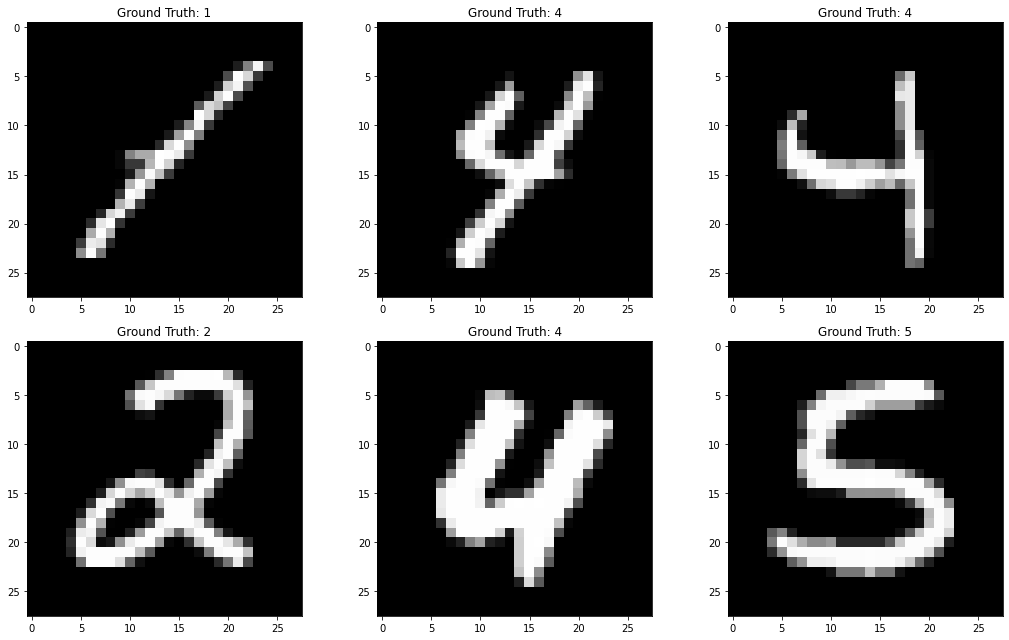

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)  

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

### 2. Model Architecture

In [ ]:
class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=784, out_features=10, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

### 3. Cost Function Define (Loss Function Define)  

In [ ]:
cls_loss = nn.CrossEntropyLoss()

### 4. Train & Evaluation

## Run Pytorch on GPU

In [ ]:
print(torch.cuda.is_available()) # pytorch가 GPU를 잘 인식하고 있다는 의미

True


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import time

# ====== Construct Model ====== #
model = LinearModel()


# ======================================== #
print(torch.cuda.is_available())
# 0의 의미: 다수의 GPU를 갖고 있는 컴퓨터의 경우, 몇번째 GPU를 사용할지 지정
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device)
# ======================================== #


print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 3
for i in range(epoch):
    ts = time.time()

    # ====== Train ====== #
    train_loss = 0
    model.train() 
    
    for input_X, true_y in train_loader:
        optimizer.zero_grad() 

        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)

        input_X = input_X.to(device) ######
        true_y = true_y.to(device) ######

        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step()

        # GPU에 loss(type: tensor)가 계산되어있는 상태인데 numpy로 바꾸려고 하니까 error 발생
        # train_loss += loss.numpy() # 잘못된 코드
        '''
        두 가지의 해결 방법 
          --> 1. loss.detach().cpu().numpy()
          --> 2. loss.item() 사용하기: .item()은 .detach() + cpu 동시 처리 가능
        '''
        # .item(): tensor 속 숫자를 스칼라 값으로 반환해준다.
        # .detach(): 기존 Tensor에서 gradient 전파가 안되는 tensor 생성 -> numpy()는 gradient를 요구하는 Tensor에 대해서는 사용할 수 없다
        train_loss += loss.item()

        # torch에서 numpy로 변경해주는 코드, cuda device로 올라간 경우 cpu로 올려준 후에 진행해야한다.
        # train_loss += loss.detach().cpu().numpy()

    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    
    with torch.no_grad(): 
        for input_X, true_y in val_loader:
            input_X = input_X.squeeze()
            input_X = input_X.view(-1, 784)

            input_X = input_X.to(device) #####
            true_y = true_y.to(device) #####

            pred_y = model(input_X)

            loss = cls_loss(pred_y.squeeze(), true_y)
            val_loss += loss.item() #####
        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()

    with torch.no_grad(): 
        for input_X, true_y in test_loader:
            input_X = input_X.squeeze()
            input_X = input_X.view(-1, 784)

            input_X = input_X.to(device) #####
            true_y = true_y.to(device) #####

            pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
            correct += pred_y.eq(true_y).sum()

        acc = correct.item() / len(test_loader.dataset) #####
        list_acc.append(acc)
        list_acc_epoch.append(i)

        te = time.time()
        print(te-ts)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%, {:3.1f}'.format(i, train_loss, val_loss, acc*100, te-ts))

True
Number of 7850 parameters
16.162967681884766
Epoch: 0, Train Loss: 1.5308093355439814, Val Loss: 0.49362842757490616, Test Acc: 88.06%, 16.2
16.33175301551819
Epoch: 1, Train Loss: 0.8848214852230628, Val Loss: 0.4188782335082187, Test Acc: 89.47%, 16.3
16.471318006515503
Epoch: 2, Train Loss: 0.7824784935740254, Val Loss: 0.3891741935210892, Test Acc: 89.99000000000001%, 16.5


### 5. Report Experiment  
학습 과정에서 기록했던 train_loss와 val_loss를 그려봅시다.   
Loss가 꾸준히 줄어드는지 확인하고 val_loss가 증가하기 시킨다면 그 이상의 학습은 점점 모델의 성능을 망침을 뜻합니다. 
그 옆에는 Epoch에 따라서 MAE metric이 얼마나 감소하는지 확인해봅시다.

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()